In [1]:
import os
import sys
import numpy as np

import matplotlib.pyplot         as plt
import mlem.mlem_reconstruct     as mr
import antea.image.fom_functions as fomf

sys.stdout = open(os.devnull, "w") ## Prevents from printing

In [2]:
path_to_mlem     = '/Users/carmenromoluque/tofpet3d/lib/libmlem.so'
reco_prefix_base = '/Users/carmenromoluque/nexus_petit_analysis/full-body-PET/fastsim_reco/images_fastsim/'

th         = ['0.5', '1.0', '1.5']
tof        = [140, 220, 240]
n_coinc    = 42031084
n_iter     = 100
save_every = 2

sys.stdout = sys.__stdout__ ## This line prevents from printing
rec_0 = mr.MLEMReconstructor(libpath=path_to_mlem)
rec_1 = mr.MLEMReconstructor(libpath=path_to_mlem)
rec_2 = mr.MLEMReconstructor(libpath=path_to_mlem)

rec_0.prefix = reco_prefix_base + f'{n_iter}iter/{th[0]}th/im_th{th[0]}_TOF{str(tof[0])}ps_{n_coinc}coinc_iter'
rec_1.prefix = reco_prefix_base + f'{n_iter}iter/{th[1]}th/im_th{th[1]}_TOF{str(tof[1])}ps_{n_coinc}coinc_iter'
rec_2.prefix = reco_prefix_base + f'{n_iter}iter/{th[2]}th/im_th{th[2]}_TOF{str(tof[2])}ps_{n_coinc}coinc_iter'

In [3]:
the_imgs0 = []
for i in range(0, n_iter, save_every):
    img = rec_0.read_image(i)
    the_imgs0.append(img)
    
the_imgs1 = []
for i in range(0, n_iter, save_every):
    img = rec_1.read_image(i)
    the_imgs1.append(img)
    
the_imgs2 = []
for i in range(0, n_iter, save_every):
    img = rec_2.read_image(i)
    the_imgs2.append(img)

In [4]:
the_imgs1[0].shape

(60, 60, 60)

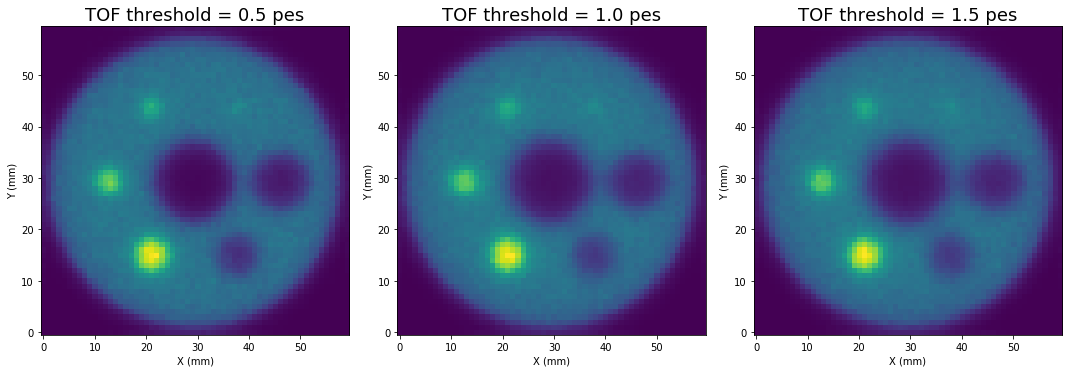

In [5]:
it = 16
slice_min = 25
slice_max = 35
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(15, 5))
im0 = ax0.imshow(np.sum(the_imgs0[int(it/save_every -1)][:,:,slice_min:slice_max], axis=2).transpose(),origin='lower')
ax0.set_title('TOF threshold = 0.5 pes', fontsize=18)
im1 = ax1.imshow(np.sum(the_imgs1[int(it/save_every -1)][:,:,slice_min:slice_max], axis=2).transpose(),origin='lower')
ax1.set_title('TOF threshold = 1.0 pes', fontsize=18)
im2 = ax2.imshow(np.sum(the_imgs2[int(it/save_every -1)][:,:,slice_min:slice_max], axis=2).transpose(),origin='lower')
ax2.set_title('TOF threshold = 1.5 pes', fontsize=18)
ax0.set_xlabel('X (mm)')
ax1.set_xlabel('X (mm)')
ax2.set_xlabel('X (mm)')
ax0.set_ylabel('Y (mm)')
ax1.set_ylabel('Y (mm)')
ax2.set_ylabel('Y (mm)')

plt.tight_layout()
plt.show()

In [6]:
## Configuration for plots ##
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = 10, 7.5

## colors
tableau = [( 31, 119, 180), (174, 199, 232), (255, 127,  14), (255, 187, 120),
           ( 44, 160,  44), (152, 223, 138), (214,  39,  40), (255, 152, 150),
           (148, 103, 189), (197, 176, 213), (140,  86,  75), (196, 156, 148),
           (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
           (188, 189,  34), (219, 219, 141), ( 23, 190, 207), (158, 218, 229), 
           (218,  60,  78), (35,  180, 203)]
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau)):
    r, g, b = tableau[i]
    tableau[i] = (r / 255., g / 255., b / 255.)

blue       = tableau[0]
green      = tableau[4]
fucsia     = tableau[6]
light_red  = tableau[20]
light_blue = tableau[21]

greens  = ['olive', 'yellowgreen', 'palegreen']
dblues  = ['navy', 'darkslateblue', 'cornflowerblue']
lblues  = ['deepskyblue', 'darkcyan', light_blue]
reds    = [light_red, 'firebrick', 'indianred']
oranges = ['orange', 'sandybrown', 'darkgoldenrod']
blacks  = ['k', 'dimgrey', 'silver']

### Image parameters:

In [7]:
sig_intensity  =  4
bckg_intensity =  1
radial_pos     = 50.
bckg_radius    =  4.
phi0           = np.pi/6
phi_step       = np.pi/3
n_phi          = 6

hot_radii   = [4., 6.5, 8.5, 11.]
cold_radii  = [14., 18.5]
hot_angles  = [np.pi/3, 2*np.pi/3, 3*np.pi/3, 4*np.pi/3]
cold_angles = [5*np.pi/3, 6*np.pi/3]

x_size = y_size = z_size = 180
x_bins = y_bins = z_bins =  60

## CRC

In [8]:
all_imgs = [the_imgs0, the_imgs1, the_imgs2]

In [9]:
crcs_hot_0,  crcs_hot_1  = [[] for i in range(len(all_imgs))], [[] for i in range(len(all_imgs))]
crcs_hot_2,  crcs_hot_3  = [[] for i in range(len(all_imgs))], [[] for i in range(len(all_imgs))]
crcs_cold_0, crcs_cold_1 = [[] for i in range(len(all_imgs))], [[] for i in range(len(all_imgs))]

err_crcs_hot_0,  err_crcs_hot_1  = [[] for i in range(len(all_imgs))], [[] for i in range(len(all_imgs))]
err_crcs_hot_2,  err_crcs_hot_3  = [[] for i in range(len(all_imgs))], [[] for i in range(len(all_imgs))]
err_crcs_cold_0, err_crcs_cold_1 = [[] for i in range(len(all_imgs))], [[] for i in range(len(all_imgs))]

for i, im in enumerate(all_imgs):
    for it in range(len(im)):
        crc_hot0, err_hot0 = fomf.crc_hot3d(im[it], sig_intensity, bckg_intensity, hot_radii[0], radial_pos,
                                            hot_angles[0], bckg_radius, phi0, phi_step, n_phi,
                                            x_size, y_size, z_size, x_bins, y_bins, z_bins)
        crc_hot1, err_hot1 = fomf.crc_hot3d(im[it], sig_intensity, bckg_intensity, hot_radii[1], radial_pos,
                                            hot_angles[1], bckg_radius, phi0, phi_step, n_phi,
                                            x_size, y_size, z_size, x_bins, y_bins, z_bins)
        crc_hot2, err_hot2 = fomf.crc_hot3d(im[it], sig_intensity, bckg_intensity, hot_radii[2], radial_pos,
                                            hot_angles[2], bckg_radius, phi0, phi_step, n_phi,
                                            x_size, y_size, z_size, x_bins, y_bins, z_bins)
        crc_hot3, err_hot3 = fomf.crc_hot3d(im[it], sig_intensity, bckg_intensity, hot_radii[3], radial_pos,
                                            hot_angles[3], bckg_radius, phi0, phi_step, n_phi,
                                            x_size, y_size, z_size, x_bins, y_bins, z_bins)
        crcs_hot_0[i].append(crc_hot0*100)
        crcs_hot_1[i].append(crc_hot1*100)
        crcs_hot_2[i].append(crc_hot2*100)
        crcs_hot_3[i].append(crc_hot3*100)
        
        err_crcs_hot_0[i].append(err_hot0*100)
        err_crcs_hot_1[i].append(err_hot1*100)
        err_crcs_hot_2[i].append(err_hot2*100)
        err_crcs_hot_3[i].append(err_hot3*100)
        
        crc_cold0, err_cold0 = fomf.crc_cold3d(im[it], cold_radii[0], radial_pos, cold_angles[0], 
                                               bckg_radius, phi0, phi_step, n_phi, x_size, y_size, z_size,
                                               x_bins, y_bins, z_bins)
        crc_cold1, err_cold1 = fomf.crc_cold3d(im[it], cold_radii[1], radial_pos, cold_angles[1], 
                                               bckg_radius, phi0, phi_step, n_phi, x_size, y_size, z_size,
                                               x_bins, y_bins, z_bins)
        crcs_cold_0[i].append(crc_cold0*100)
        crcs_cold_1[i].append(crc_cold1*100)
        
        err_crcs_cold_0[i].append(err_cold0*100)
        err_crcs_cold_1[i].append(err_cold1*100)

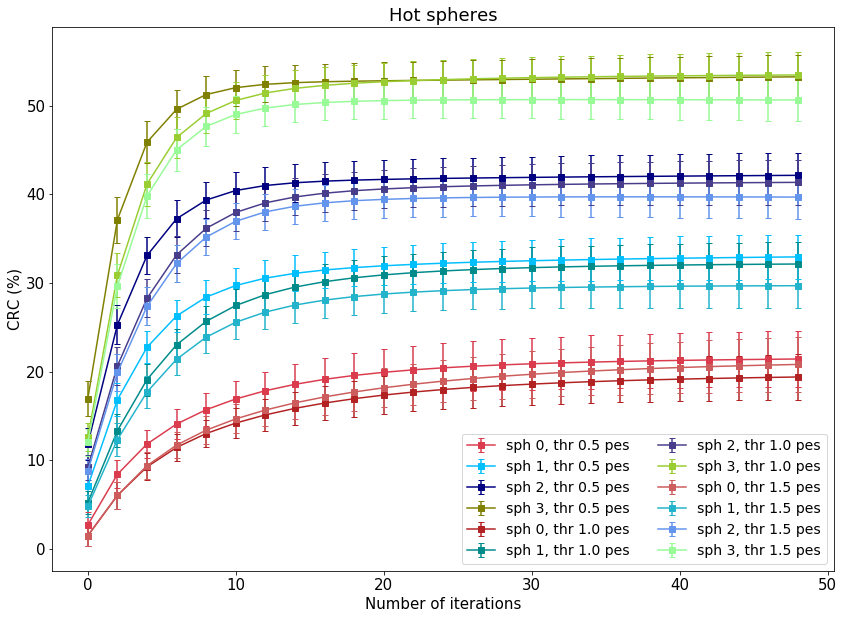

In [10]:
plt.figure(figsize=(14,10))
sel_n_iter = 50
for i in range(len(all_imgs)):
    plt.errorbar(list(range(0, sel_n_iter, save_every)), crcs_hot_0[i][:int(sel_n_iter/save_every)], yerr=err_crcs_hot_0[i][:int(sel_n_iter/save_every)], xerr=None,
                 color=reds[i], marker='s', capsize=3, label=f'sph 0, thr {th[i]} pes')
    plt.errorbar(list(range(0, sel_n_iter, save_every)), crcs_hot_1[i][:int(sel_n_iter/save_every)], yerr=err_crcs_hot_1[i][:int(sel_n_iter/save_every)], xerr=None,
                 color=lblues[i], marker='s', capsize=3, label=f'sph 1, thr {th[i]} pes')
    plt.errorbar(list(range(0, sel_n_iter, save_every)), crcs_hot_2[i][:int(sel_n_iter/save_every)], yerr=err_crcs_hot_2[i][:int(sel_n_iter/save_every)], xerr=None,
                 color=dblues[i], marker='s', capsize=3, label=f'sph 2, thr {th[i]} pes')
    plt.errorbar(list(range(0, sel_n_iter, save_every)), crcs_hot_3[i][:int(sel_n_iter/save_every)], yerr=err_crcs_hot_3[i][:int(sel_n_iter/save_every)], xerr=None,
                 color=greens[i], marker='s', capsize=3, label=f'sph 3, thr {th[i]} pes')
#plt.xticks(list(range(0, sel_n_iter, save_every)))
plt.title('Hot spheres')
plt.xlabel('Number of iterations')
plt.ylabel('CRC (%)')
plt.legend(loc=4, fontsize=14, ncol=2);

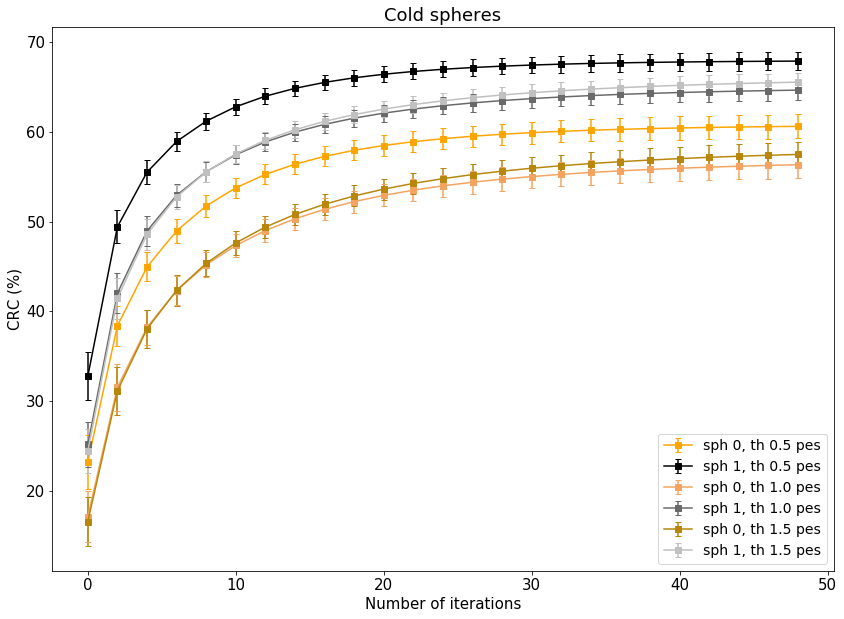

In [11]:
plt.figure(figsize=(14,10))
sel_n_iter = 50
for i in range(len(all_imgs)):
    plt.errorbar(list(range(0, sel_n_iter, save_every)), crcs_cold_0[i][:int(sel_n_iter/save_every)], yerr=err_crcs_cold_0[i][:int(sel_n_iter/save_every)], xerr=None,
                 color=oranges[i], marker='s', capsize=3, label=f'sph 0, th {th[i]} pes')
    plt.errorbar(list(range(0, sel_n_iter, save_every)), crcs_cold_1[i][:int(sel_n_iter/save_every)], yerr=err_crcs_cold_1[i][:int(sel_n_iter/save_every)], xerr=None,
                 color=blacks[i], marker='s', capsize=3, label=f'sph 1, th {th[i]} pes')
plt.title('Cold spheres')
plt.xlabel('Number of iterations')
plt.ylabel('CRC (%)')
plt.legend(loc=4, fontsize=14);


## SNR

In [12]:
snrs_hot_0,  snrs_hot_1  = [[] for i in range(len(all_imgs))], [[] for i in range(len(all_imgs))]
snrs_hot_2,  snrs_hot_3  = [[] for i in range(len(all_imgs))], [[] for i in range(len(all_imgs))]
snrs_cold_0, snrs_cold_1 = [[] for i in range(len(all_imgs))], [[] for i in range(len(all_imgs))]

err_snrs_hot_0,  err_snrs_hot_1  = [[] for i in range(len(all_imgs))], [[] for i in range(len(all_imgs))]
err_snrs_hot_2,  err_snrs_hot_3  = [[] for i in range(len(all_imgs))], [[] for i in range(len(all_imgs))]
err_snrs_cold_0, err_snrs_cold_1 = [[] for i in range(len(all_imgs))], [[] for i in range(len(all_imgs))]

for i, im in enumerate(all_imgs):
    for it in range(len(im)):
        snr_hot0, err_hot0 = fomf.snr3d(im[it], hot_radii[0], radial_pos, hot_angles[0], 
                                bckg_radius, phi0, phi_step, n_phi, x_size, y_size, z_size,
                                x_bins, y_bins, z_bins)
        snr_hot1, err_hot1 = fomf.snr3d(im[it], hot_radii[1], radial_pos, hot_angles[1], 
                                    bckg_radius, phi0, phi_step, n_phi, x_size, y_size, z_size,
                                    x_bins, y_bins, z_bins)
        snr_hot2, err_hot2 = fomf.snr3d(im[it], hot_radii[2], radial_pos, hot_angles[2], 
                                    bckg_radius, phi0, phi_step, n_phi, x_size, y_size, z_size,
                                    x_bins, y_bins, z_bins)
        snr_hot3, err_hot3 = fomf.snr3d(im[it], hot_radii[3], radial_pos, hot_angles[3], 
                                    bckg_radius, phi0, phi_step, n_phi, x_size, y_size, z_size,
                                    x_bins, y_bins, z_bins)

        snrs_hot_0[i].append(snr_hot0)
        snrs_hot_1[i].append(snr_hot1)
        snrs_hot_2[i].append(snr_hot2)
        snrs_hot_3[i].append(snr_hot3)
        
        err_snrs_hot_0[i].append(err_hot0)
        err_snrs_hot_1[i].append(err_hot1)
        err_snrs_hot_2[i].append(err_hot2)
        err_snrs_hot_3[i].append(err_hot3)
        
        snr_cold0, err_cold0 = fomf.snr3d(im[it], cold_radii[0], radial_pos, cold_angles[0], 
                                    bckg_radius, phi0, phi_step, n_phi, x_size, y_size, z_size,
                                    x_bins, y_bins, z_bins)
        snr_cold1, err_cold1 = fomf.snr3d(im[it], cold_radii[1], radial_pos, cold_angles[1], 
                                    bckg_radius, phi0, phi_step, n_phi, x_size, y_size, z_size,
                                    x_bins, y_bins, z_bins)
        
        snrs_cold_0[i].append(snr_cold0)
        snrs_cold_1[i].append(snr_cold1)
        
        err_snrs_cold_0[i].append(err_cold0)
        err_snrs_cold_1[i].append(err_cold1)

In [13]:
len(snrs_hot_0[0])

50

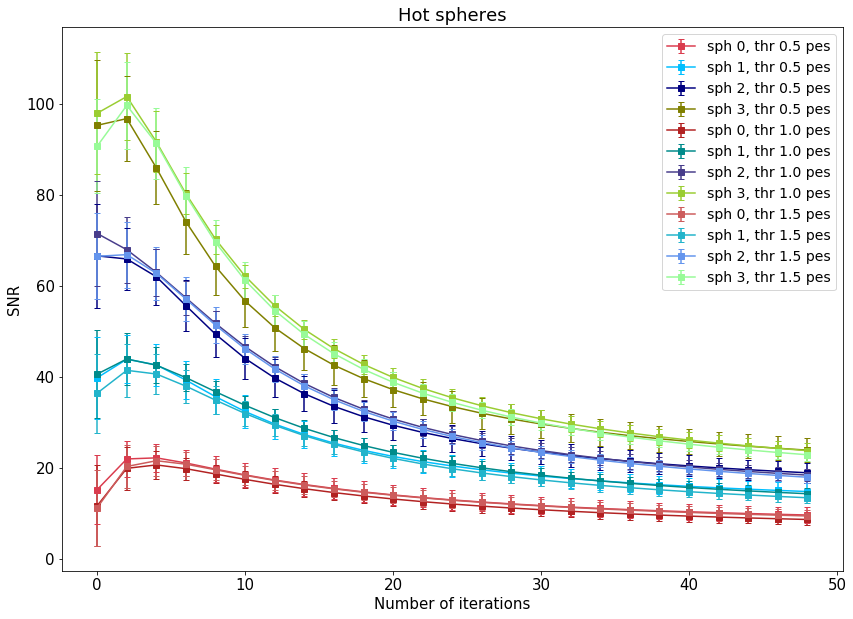

In [15]:
plt.figure(figsize=(14,10))
sel_n_iter = 50
for i in range(len(all_imgs)):
    plt.errorbar(list(range(0, sel_n_iter, save_every)), snrs_hot_0[i][:int(sel_n_iter/save_every)], yerr=err_snrs_hot_0[i][:int(sel_n_iter/save_every)], xerr=None,
                 color=reds[i], marker='s', capsize=3, label=f'sph 0, thr {th[i]} pes')
    plt.errorbar(list(range(0, sel_n_iter, save_every)), snrs_hot_1[i][:int(sel_n_iter/save_every)], yerr=err_snrs_hot_1[i][:int(sel_n_iter/save_every)], xerr=None,
                 color=lblues[i], marker='s', capsize=3, label=f'sph 1, thr {th[i]} pes')
    plt.errorbar(list(range(0, sel_n_iter, save_every)), snrs_hot_2[i][:int(sel_n_iter/save_every)], yerr=err_snrs_hot_2[i][:int(sel_n_iter/save_every)], xerr=None,
                 color=dblues[i], marker='s', capsize=3, label=f'sph 2, thr {th[i]} pes')
    plt.errorbar(list(range(0, sel_n_iter, save_every)), snrs_hot_3[i][:int(sel_n_iter/save_every)], yerr=err_snrs_hot_3[i][:int(sel_n_iter/save_every)], xerr=None,
                 color=greens[i], marker='s', capsize=3, label=f'sph 3, thr {th[i]} pes')
plt.title('Hot spheres')
plt.xlabel('Number of iterations')
plt.ylabel('SNR')
plt.legend(loc=1, fontsize=14);

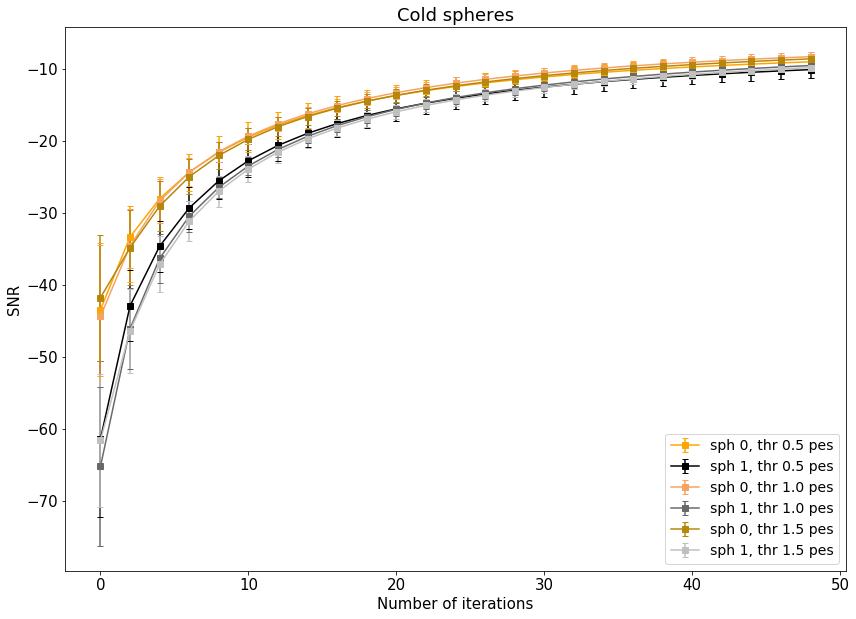

In [16]:
plt.figure(figsize=(14,10))
sel_n_iter = 50
for i in range(len(all_imgs)):
    plt.errorbar(list(range(0, sel_n_iter, save_every)), snrs_cold_0[i][:int(sel_n_iter/save_every)], yerr=err_snrs_cold_0[i][:int(sel_n_iter/save_every)], xerr=None,
                 color=oranges[i], marker='s', capsize=3, label=f'sph 0, thr {th[i]} pes')
    plt.errorbar(list(range(0, sel_n_iter, save_every)), snrs_cold_1[i][:int(sel_n_iter/save_every)], yerr=err_snrs_cold_1[i][:int(sel_n_iter/save_every)], xerr=None,
                 color=blacks[i], marker='s', capsize=3, label=f'sph 1, thr {th[i]} pes')
plt.title('Cold spheres')
plt.xlabel('Number of iterations')
plt.ylabel('SNR')
plt.legend(loc=4, fontsize=14);

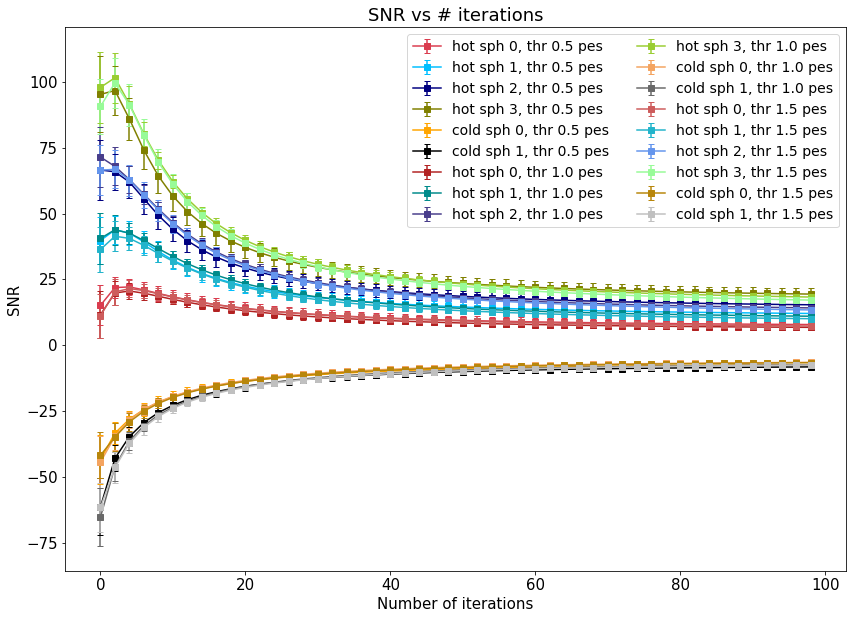

In [17]:
plt.figure(figsize=(14,10))
sel_n_iter = 100
for i in range(len(all_imgs)):
    plt.errorbar(list(range(0, sel_n_iter, save_every)), snrs_hot_0[i][:int(sel_n_iter/save_every)], yerr=err_snrs_hot_0[i][:int(sel_n_iter/save_every)], xerr=None,
                 color=reds[i], marker='s', capsize=3, label=f'hot sph 0, thr {th[i]} pes')
    plt.errorbar(list(range(0, sel_n_iter, save_every)), snrs_hot_1[i][:int(sel_n_iter/save_every)], yerr=err_snrs_hot_1[i][:int(sel_n_iter/save_every)], xerr=None,
                 color=lblues[i], marker='s', capsize=3, label=f'hot sph 1, thr {th[i]} pes')
    plt.errorbar(list(range(0, sel_n_iter, save_every)), snrs_hot_2[i][:int(sel_n_iter/save_every)], yerr=err_snrs_hot_2[i][:int(sel_n_iter/save_every)], xerr=None,
                 color=dblues[i], marker='s', capsize=3, label=f'hot sph 2, thr {th[i]} pes')
    plt.errorbar(list(range(0, sel_n_iter, save_every)), snrs_hot_3[i][:int(sel_n_iter/save_every)], yerr=err_snrs_hot_3[i][:int(sel_n_iter/save_every)], xerr=None,
                 color=greens[i], marker='s', capsize=3, label=f'hot sph 3, thr {th[i]} pes')
    plt.errorbar(list(range(0, sel_n_iter, save_every)), snrs_cold_0[i][:int(sel_n_iter/save_every)], yerr=err_snrs_cold_0[i][:int(sel_n_iter/save_every)], xerr=None,
                 color=oranges[i], marker='s', capsize=3, label=f'cold sph 0, thr {th[i]} pes')
    plt.errorbar(list(range(0, sel_n_iter, save_every)), snrs_cold_1[i][:int(sel_n_iter/save_every)], yerr=err_snrs_cold_1[i][:int(sel_n_iter/save_every)], xerr=None,
                 color=blacks[i], marker='s', capsize=3, label=f'cold sph 1, thr {th[i]} pes')
plt.title('SNR vs # iterations')
plt.xlabel('Number of iterations')
plt.ylabel('SNR')
plt.legend(loc=1, fontsize=14, ncol=2);